<h2>
Code for: Choosing a Location for a Medical Center      
    <p></p>By: Breeann Flesch

In [1]:
#all of the libraries for the following code
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize 
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors
import sklearn.utils
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import folium 
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         395 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5

<h4>
The following code creates a dataframe from the a .csv file with locations (latitude and longitude) and zip codes (also known as postal codes) downloaded from the United States Zip Codes database.  

In [2]:
zips = pd.read_csv("zip_code_database.csv") #zip codes and lat/long for the entire country 
colorado = zips[zips['state'] == 'CO'] #limit the data to colorado
colorado = colorado[['zip','primary_city','state','county','latitude','longitude']] #keep columns of interest
colorado = colorado.reset_index(drop=True) #reset indices
colorado.head()

,zip,primary_city,state,county,latitude,longitude
0,80001,Arvada,CO,Jefferson County,39.82,-105.10
1,80002,Arvada,CO,Jefferson County,39.79,-105.11
2,80003,Arvada,CO,Jefferson County,39.83,-105.06
3,80004,Arvada,CO,Jefferson County,39.82,-105.10
4,80005,Arvada,CO,Jefferson County,39.85,-105.13


<h4>
The following code creates a dataframe with demographic information from a .csv file downloaded from the state of Colorado that is broken down by zip code.

In [3]:
zips_dem = pd.read_csv("zip_codes_2015.csv") 
#cleaning a very messy dataframe
zips_dem = zips_dem[zips_dem['zip_code'].str.find('-')<0] # Getting rid of rows with no zip codes
zips_dem.drop(zips_dem.iloc[:,34:12504], inplace=True, axis = 1) #only keeping the pertinent information
zips_dem = zips_dem.rename(columns={"zip_code":"zip"}) #renaming for eventual merge
zips_dem['zip'] = pd.to_numeric(zips_dem['zip']) #converting to numerical information for comparison in merge
zips_dem = zips_dem.sort_values(by='zip') #sorting by the zip code
zips_dem = zips_dem.reset_index(drop=True) #reindexing
zips_dem.head()

,zip,pop,hispanic,white_nh,ntvam_nh,black_nh,asian_nh,hawpi_nh,other_nh,twoplus_nh,male,female,ageless5,age5_9,age10_14,age15_19,age20_24,age25_29,age30_34,age35_39,age40_44,age45_49,age50_54,age55_59,age60_64,age65_69,age70_74,age75_79,age80_84,age85pl,ageless18,age18_24,med_age,households
0,80002,18439,4742,12900,28,164,411,0,29,165,9121,9318,887,1057,1092,1012,1445,1517,1297,1214,1295,1329,1780,1284,954,834,577,413,200,252,3605,1888,38.7,8227
1,80003,36518,9024,25104,382,534,888,5,12,569,17694,18824,2088,2489,2336,2403,2265,2749,2769,2272,2350,2238,3064,2615,2158,1559,1277,907,607,372,8270,3311,37.2,14198
2,80004,37070,4641,30749,172,435,414,2,6,651,17623,19447,2212,2099,2206,2192,2102,2446,2524,2395,1829,2474,2942,2709,2520,1842,1134,1423,916,1105,7893,2918,41,14814
3,80005,27662,2486,23740,21,139,779,0,48,449,13795,13867,1671,1632,1856,1682,1263,1125,1416,1877,1973,2323,2356,2176,2038,1557,1086,800,449,382,6415,1689,43.5,10671
4,80007,7537,368,6793,0,17,187,0,5,167,3674,3863,341,509,594,544,264,232,220,517,532,558,861,646,597,508,219,189,124,82,1834,418,45.1,2742


<h4>
The following code merges the two previous dataframes based on the zip codes and converts all of the important data to numerical. 

In [4]:
Colorado_merge = pd.merge(colorado, zips_dem, on='zip')
Colorado_merge.dropna(inplace=True)
Colorado_merge['pop'] = pd.to_numeric(Colorado_merge['pop'])
Colorado_merge['white_nh']=pd.to_numeric(Colorado_merge['white_nh'])
Colorado_merge['female']=pd.to_numeric(Colorado_merge['female'])
Colorado_merge['male']=pd.to_numeric(Colorado_merge['male'])
Colorado_merge['pop']=pd.to_numeric(Colorado_merge['pop'])
Colorado_merge['age50_54']=pd.to_numeric(Colorado_merge['age50_54'])
Colorado_merge['age55_59']=pd.to_numeric(Colorado_merge['age55_59'])
Colorado_merge['age60_64']=pd.to_numeric(Colorado_merge['age60_64'])
Colorado_merge['age65_69']=pd.to_numeric(Colorado_merge['age65_69'])
Colorado_merge['age70_74']=pd.to_numeric(Colorado_merge['age70_74'])
Colorado_merge['age75_79']=pd.to_numeric(Colorado_merge['age75_79'])
Colorado_merge['age80_84']=pd.to_numeric(Colorado_merge['age80_84'])
Colorado_merge['age85pl']=pd.to_numeric(Colorado_merge['age85pl'])
Colorado_merge.head()

,zip,primary_city,state,county,latitude,longitude,pop,hispanic,white_nh,ntvam_nh,black_nh,asian_nh,hawpi_nh,other_nh,twoplus_nh,male,female,ageless5,age5_9,age10_14,age15_19,age20_24,age25_29,age30_34,age35_39,age40_44,age45_49,age50_54,age55_59,age60_64,age65_69,age70_74,age75_79,age80_84,age85pl,ageless18,age18_24,med_age,households
0,80002,Arvada,CO,Jefferson County,39.79,-105.11,18439,4742,12900,28,164,411,0,29,165,9121,9318,887,1057,1092,1012,1445,1517,1297,1214,1295,1329,1780,1284,954,834,577,413,200,252,3605,1888,38.7,8227
1,80003,Arvada,CO,Jefferson County,39.83,-105.06,36518,9024,25104,382,534,888,5,12,569,17694,18824,2088,2489,2336,2403,2265,2749,2769,2272,2350,2238,3064,2615,2158,1559,1277,907,607,372,8270,3311,37.2,14198
2,80004,Arvada,CO,Jefferson County,39.82,-105.10,37070,4641,30749,172,435,414,2,6,651,17623,19447,2212,2099,2206,2192,2102,2446,2524,2395,1829,2474,2942,2709,2520,1842,1134,1423,916,1105,7893,2918,41,14814
3,80005,Arvada,CO,Jefferson County,39.85,-105.13,27662,2486,23740,21,139,779,0,48,449,13795,13867,1671,1632,1856,1682,1263,1125,1416,1877,1973,2323,2356,2176,2038,1557,1086,800,449,382,6415,1689,43.5,10671
4,80007,Arvada,CO,Jefferson County,39.86,-105.19,7537,368,6793,0,17,187,0,5,167,3674,3863,341,509,594,544,264,232,220,517,532,558,861,646,597,508,219,189,124,82,1834,418,45.1,2742


<h4>
The following code is a function that was provided in a lab in this course.  It returns nearby venues based on latitude and longitude using the foursquare API. 

In [5]:
def getNearbyVenues(names, latitudes, longitudes, radius=500): 
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            'G3TC2GCVWN20D45PNKZO5TZKMHOOMXB33WHBN3ZP2P0KZIPH', 
            'XT2GGR1BPUQQZVJKJWBTNV2OPKWWS3HCEAAOYP4ONCPAVEL5', 
            '20180604', 
            lat, 
            lng, 
            radius, 
            200)
        results = requests.get(url).json()["response"]['groups'][0]['items']
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'] 
    return(nearby_venues)

<h4>
The following code calls the above function using the Colorado information with the zip used as the neighborhood and associated latitude and longitude.  We are getting this information for eventual use for clustering our zip codes.    

In [6]:
Colorado_venues = Colorado_merge.copy() #creating a copy of colorado merge to preserve the original
Colorado_venues = getNearbyVenues(names=Colorado_venues['zip'],
                                   latitudes=Colorado_venues['latitude'],
                                   longitudes=Colorado_venues['longitude']
                                  )
Colorado_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,80002,39.79,-105.11,Qdoba Mexican Grill,39.788980,-105.110002,Mexican Restaurant
1,80002,39.79,-105.11,Starbucks,39.787001,-105.109980,Coffee Shop
2,80002,39.79,-105.11,Luke's,39.786902,-105.108459,Steakhouse
3,80002,39.79,-105.11,Jersey Mike's Subs,39.789081,-105.109985,Sandwich Place
4,80002,39.79,-105.11,Popeyes Louisiana Kitchen,39.788292,-105.110074,Fried Chicken Joint


<h4> The following code creates a dataframe that lists the most popular types of venue for each zip code.  It is also from a lab in this course.  

In [7]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

Colorado_hot = pd.get_dummies(Colorado_venues[['Venue Category']], prefix="", prefix_sep="")
Colorado_hot['Neighborhood'] = Colorado_venues['Neighborhood'] 
fixed_columns = [Colorado_hot.columns[-1]] + list(Colorado_hot.columns[:-1])
Colorado_hot = Colorado_hot[fixed_columns]
Colorado_grouped = Colorado_hot.groupby('Neighborhood').mean().reset_index()
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

Colorado_venues_sorted = pd.DataFrame(columns=columns)
Colorado_venues_sorted['Neighborhood'] = Colorado_grouped['Neighborhood']
for ind in np.arange(Colorado_grouped.shape[0]):
    Colorado_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Colorado_grouped.iloc[ind, :], num_top_venues)

Colorado_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,80002,Mexican Restaurant,Coffee Shop,Sandwich Place,Mobile Phone Shop,Organic Grocery,Bagel Shop,Fast Food Restaurant,Big Box Store,Salon / Barbershop,Sporting Goods Shop
1,80003,Convenience Store,Park,Baseball Field,Women's Store,Donut Shop,Flower Shop,Flea Market,Fishing Spot,Fast Food Restaurant,Farm
2,80004,Nature Preserve,Convenience Store,Women's Store,Donut Shop,Flower Shop,Flea Market,Fishing Spot,Fast Food Restaurant,Farm,Fabric Shop
3,80005,Business Service,Playground,Arcade,Lake,Donut Shop,Flower Shop,Flea Market,Fishing Spot,Fast Food Restaurant,Farm
4,80007,Outdoor Sculpture,Women's Store,Discount Store,Flower Shop,Flea Market,Fishing Spot,Fast Food Restaurant,Farm,Fabric Shop,Eye Doctor


<h4>
The following code clusters the zip codes using k-means clustering and based on the venue information.  Again, this code is from a lab in this course.  Notice the Cluster Labels by scrolling the dataframe.    

In [8]:
kclusters = 13
grouped_clustering = Colorado_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)
kmeans.labels_[0:10] 
Colorado_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
Colorado_Community = Colorado_merge.copy()
Colorado_Community = Colorado_Community.rename(columns={"zip":"Neighborhood"})
Colorado_Community = Colorado_Community.join(Colorado_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Colorado_Community.head()

,Neighborhood,primary_city,state,county,latitude,longitude,pop,hispanic,white_nh,ntvam_nh,black_nh,asian_nh,hawpi_nh,other_nh,twoplus_nh,male,female,ageless5,age5_9,age10_14,age15_19,age20_24,age25_29,age30_34,age35_39,age40_44,age45_49,age50_54,age55_59,age60_64,age65_69,age70_74,age75_79,age80_84,age85pl,ageless18,age18_24,med_age,households,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,80002,Arvada,CO,Jefferson County,39.79,-105.11,18439,4742,12900,28,164,411,0,29,165,9121,9318,887,1057,1092,1012,1445,1517,1297,1214,1295,1329,1780,1284,954,834,577,413,200,252,3605,1888,38.7,8227,9.0,Mexican Restaurant,Coffee Shop,Sandwich Place,Mobile Phone Shop,Organic Grocery,Bagel Shop,Fast Food Restaurant,Big Box Store,Salon / Barbershop,Sporting Goods Shop
1,80003,Arvada,CO,Jefferson County,39.83,-105.06,36518,9024,25104,382,534,888,5,12,569,17694,18824,2088,2489,2336,2403,2265,2749,2769,2272,2350,2238,3064,2615,2158,1559,1277,907,607,372,8270,3311,37.2,14198,1.0,Convenience Store,Park,Baseball Field,Women's Store,Donut Shop,Flower Shop,Flea Market,Fishing Spot,Fast Food Restaurant,Farm
2,80004,Arvada,CO,Jefferson County,39.82,-105.10,37070,4641,30749,172,435,414,2,6,651,17623,19447,2212,2099,2206,2192,2102,2446,2524,2395,1829,2474,2942,2709,2520,1842,1134,1423,916,1105,7893,2918,41,14814,9.0,Nature Preserve,Convenience Store,Women's Store,Donut Shop,Flower Shop,Flea Market,Fishing Spot,Fast Food Restaurant,Farm,Fabric Shop
3,80005,Arvada,CO,Jefferson County,39.85,-105.13,27662,2486,23740,21,139,779,0,48,449,13795,13867,1671,1632,1856,1682,1263,1125,1416,1877,1973,2323,2356,2176,2038,1557,1086,800,449,382,6415,1689,43.5,10671,9.0,Business Service,Playground,Arcade,Lake,Donut Shop,Flower Shop,Flea Market,Fishing Spot,Fast Food Restaurant,Farm
4,80007,Arvada,CO,Jefferson County,39.86,-105.19,7537,368,6793,0,17,187,0,5,167,3674,3863,341,509,594,544,264,232,220,517,532,558,861,646,597,508,219,189,124,82,1834,418,45.1,2742,9.0,Outdoor Sculpture,Women's Store,Discount Store,Flower Shop,Flea Market,Fishing Spot,Fast Food Restaurant,Farm,Fabric Shop,Eye Doctor


<h4>
Below is a function to assign colors to different cluster labels for visualization purposes.

In [9]:
def color_producer(cluster):
    if cluster == 0:
        return 'green'
    elif cluster == 1:
        return 'orange'
    elif cluster == 2:
        return 'lightblue'
    elif cluster == 3:
        return 'pink'
    elif cluster == 4:
        return 'cadetblue'
    elif cluster == 5:
        return 'grey'
    elif cluster == 6:
        return 'purple'
    elif cluster == 7:
        return 'white'
    elif cluster == 8:
        return 'darkred'
    elif cluster == 9:
        return 'lightred'
    elif cluster == 10:
        return 'yellow'
    elif cluster == 11:
        return 'tan'
    else:
        return 'black'

<h4>
The following code is a map with a visualization of cluster assignment based on the process above using the venues to the different zip codes.  

In [11]:
map_colorado_0 = folium.Map(location=[39.5501, -105.7821], zoom_start=7)

for lat, lng, zipp, city, population, cluster in zip(Colorado_Community['latitude'], Colorado_Community['longitude'], Colorado_Community['Neighborhood'], Colorado_Community['primary_city'],Colorado_Community['pop'], Colorado_Community["Cluster Labels"]):
    label = '{}, {}, population: {}'.format(city, zipp, population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color_producer(cluster),
        fill=True,
        fill_color=color_producer(cluster),
        fill_opacity=0.7,
        parse_html=False).add_to(map_colorado_0)  
    
map_colorado_0

<h4>
The above display does not meet our needs for creating communities.  Another clustering attempt, where all of the numerical information, including location and demographics, is used to create communities.  Notice the "Clus_km" at the end of the dataframe which is the clustering labels.   

In [12]:
#creating a dataframe with just the numerical information
Colorado_Numbers = Colorado_merge.copy()
Colorado_Numbers.drop(Colorado_Numbers.iloc[:,0:4], inplace=True, axis = 1)

#clustering using all the numerical information
X = Colorado_Numbers.values[:,1:]
X = np.nan_to_num(X)
X= preprocessing.StandardScaler().fit(X).transform(X)
Clus_dataSet = StandardScaler().fit_transform(X)
clusterNum = 12
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
Colorado_merge["Clus_km"] = labels
Colorado_merge.head()

,zip,primary_city,state,county,latitude,longitude,pop,hispanic,white_nh,ntvam_nh,black_nh,asian_nh,hawpi_nh,other_nh,twoplus_nh,male,female,ageless5,age5_9,age10_14,age15_19,age20_24,age25_29,age30_34,age35_39,age40_44,age45_49,age50_54,age55_59,age60_64,age65_69,age70_74,age75_79,age80_84,age85pl,ageless18,age18_24,med_age,households,Clus_km
0,80002,Arvada,CO,Jefferson County,39.79,-105.11,18439,4742,12900,28,164,411,0,29,165,9121,9318,887,1057,1092,1012,1445,1517,1297,1214,1295,1329,1780,1284,954,834,577,413,200,252,3605,1888,38.7,8227,6
1,80003,Arvada,CO,Jefferson County,39.83,-105.06,36518,9024,25104,382,534,888,5,12,569,17694,18824,2088,2489,2336,2403,2265,2749,2769,2272,2350,2238,3064,2615,2158,1559,1277,907,607,372,8270,3311,37.2,14198,3
2,80004,Arvada,CO,Jefferson County,39.82,-105.10,37070,4641,30749,172,435,414,2,6,651,17623,19447,2212,2099,2206,2192,2102,2446,2524,2395,1829,2474,2942,2709,2520,1842,1134,1423,916,1105,7893,2918,41,14814,2
3,80005,Arvada,CO,Jefferson County,39.85,-105.13,27662,2486,23740,21,139,779,0,48,449,13795,13867,1671,1632,1856,1682,1263,1125,1416,1877,1973,2323,2356,2176,2038,1557,1086,800,449,382,6415,1689,43.5,10671,2
4,80007,Arvada,CO,Jefferson County,39.86,-105.19,7537,368,6793,0,17,187,0,5,167,3674,3863,341,509,594,544,264,232,220,517,532,558,861,646,597,508,219,189,124,82,1834,418,45.1,2742,10


<h4>
Again, a visualization using folium and the color-coded cluster labels created above.  

In [13]:
map_colorado_1 = folium.Map(location=[39.5501, -105.7821], zoom_start=7)

for lat, lng, zipp, city, population, cluster in zip(Colorado_merge['latitude'], Colorado_merge['longitude'], Colorado_merge['zip'], Colorado_merge['primary_city'],Colorado_merge['pop'], Colorado_merge['Clus_km']):
    label = '{}, {}, population: {}'.format(city, zipp, population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color_producer(cluster),
        fill=True,
        fill_color=color_producer(cluster),
        fill_opacity=0.7,
        parse_html=False).add_to(map_colorado_1)  
    
map_colorado_1

<h4>
This again does not meet our needs.  So we try a third attempt at clustering the zip codes based solely on location data.  

In [14]:
#Restricting it to just the latitude and longitude data
Colorado_2 = Colorado_merge.copy()
Colorado_lat_long = Colorado_merge[['latitude','longitude']]
Colorado_lat_long.head()
normalized_Colorado=(Colorado_lat_long-Colorado_lat_long.mean())/Colorado_lat_long.std()
X1 = normalized_Colorado.values[:,1:]
X1 = np.nan_to_num(X1)
X1= preprocessing.StandardScaler().fit(X1).transform(X1)
Clus_dataSet1 = StandardScaler().fit_transform(X1)
clusterNum = 12
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X1)
labels1 = k_means.labels_
Colorado_merge["Clus_km2"] = labels1
Colorado_merge.head()

,zip,primary_city,state,county,latitude,longitude,pop,hispanic,white_nh,ntvam_nh,black_nh,asian_nh,hawpi_nh,other_nh,twoplus_nh,male,female,ageless5,age5_9,age10_14,age15_19,age20_24,age25_29,age30_34,age35_39,age40_44,age45_49,age50_54,age55_59,age60_64,age65_69,age70_74,age75_79,age80_84,age85pl,ageless18,age18_24,med_age,households,Clus_km,Clus_km2
0,80002,Arvada,CO,Jefferson County,39.79,-105.11,18439,4742,12900,28,164,411,0,29,165,9121,9318,887,1057,1092,1012,1445,1517,1297,1214,1295,1329,1780,1284,954,834,577,413,200,252,3605,1888,38.7,8227,6,10
1,80003,Arvada,CO,Jefferson County,39.83,-105.06,36518,9024,25104,382,534,888,5,12,569,17694,18824,2088,2489,2336,2403,2265,2749,2769,2272,2350,2238,3064,2615,2158,1559,1277,907,607,372,8270,3311,37.2,14198,3,10
2,80004,Arvada,CO,Jefferson County,39.82,-105.10,37070,4641,30749,172,435,414,2,6,651,17623,19447,2212,2099,2206,2192,2102,2446,2524,2395,1829,2474,2942,2709,2520,1842,1134,1423,916,1105,7893,2918,41,14814,2,10
3,80005,Arvada,CO,Jefferson County,39.85,-105.13,27662,2486,23740,21,139,779,0,48,449,13795,13867,1671,1632,1856,1682,1263,1125,1416,1877,1973,2323,2356,2176,2038,1557,1086,800,449,382,6415,1689,43.5,10671,2,10
4,80007,Arvada,CO,Jefferson County,39.86,-105.19,7537,368,6793,0,17,187,0,5,167,3674,3863,341,509,594,544,264,232,220,517,532,558,861,646,597,508,219,189,124,82,1834,418,45.1,2742,10,10


<h4>
Again, visualization of this attempt to create communities.  

In [15]:
map_colorado_2 = folium.Map(location=[39.5501, -105.7821], zoom_start=7)

for lat, lng, zipp, city, population, cluster in zip(Colorado_merge['latitude'], Colorado_merge['longitude'], Colorado_merge['zip'], Colorado_merge['primary_city'],Colorado_merge['pop'], Colorado_merge['Clus_km2']):
    label = '{}, {}, population: {}'.format(city, zipp, population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color_producer(cluster),
        fill=True,
        fill_color=color_producer(cluster),
        fill_opacity=0.7,
        parse_html=False).add_to(map_colorado_2)  
    
map_colorado_2

<h4>
Again, this does not meet our needs. But that makes sense, since k-means doesn't work will with Euclidean distances, which is what we have here.  Moving to a new tool for clustering, the density cluster.  Now there are outliers, which are black.  

In [16]:
sklearn.utils.check_random_state(1000)
Clus_dataSet3 = Colorado_lat_long[["latitude","longitude"]]
Clus_dataSet3 = np.nan_to_num(Clus_dataSet3)
Clus_dataSet3 = StandardScaler().fit_transform(Clus_dataSet3)

# Compute DBSCAN
db = DBSCAN(eps=.1, min_samples=3, metric='euclidean').fit(Clus_dataSet3)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
Colorado_merge["Clus_Db"]=labels
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 
Colorado_merge.head()

,zip,primary_city,state,county,latitude,longitude,pop,hispanic,white_nh,ntvam_nh,black_nh,asian_nh,hawpi_nh,other_nh,twoplus_nh,male,female,ageless5,age5_9,age10_14,age15_19,age20_24,age25_29,age30_34,age35_39,age40_44,age45_49,age50_54,age55_59,age60_64,age65_69,age70_74,age75_79,age80_84,age85pl,ageless18,age18_24,med_age,households,Clus_km,Clus_km2,Clus_Db
0,80002,Arvada,CO,Jefferson County,39.79,-105.11,18439,4742,12900,28,164,411,0,29,165,9121,9318,887,1057,1092,1012,1445,1517,1297,1214,1295,1329,1780,1284,954,834,577,413,200,252,3605,1888,38.7,8227,6,10,0
1,80003,Arvada,CO,Jefferson County,39.83,-105.06,36518,9024,25104,382,534,888,5,12,569,17694,18824,2088,2489,2336,2403,2265,2749,2769,2272,2350,2238,3064,2615,2158,1559,1277,907,607,372,8270,3311,37.2,14198,3,10,0
2,80004,Arvada,CO,Jefferson County,39.82,-105.10,37070,4641,30749,172,435,414,2,6,651,17623,19447,2212,2099,2206,2192,2102,2446,2524,2395,1829,2474,2942,2709,2520,1842,1134,1423,916,1105,7893,2918,41,14814,2,10,0
3,80005,Arvada,CO,Jefferson County,39.85,-105.13,27662,2486,23740,21,139,779,0,48,449,13795,13867,1671,1632,1856,1682,1263,1125,1416,1877,1973,2323,2356,2176,2038,1557,1086,800,449,382,6415,1689,43.5,10671,2,10,0
4,80007,Arvada,CO,Jefferson County,39.86,-105.19,7537,368,6793,0,17,187,0,5,167,3674,3863,341,509,594,544,264,232,220,517,532,558,861,646,597,508,219,189,124,82,1834,418,45.1,2742,10,10,0


<h4>
The visualization of this attempt to cluster.  

In [17]:
map_colorado_3 = folium.Map(location=[39.5501, -105.7821], zoom_start=7)

for lat, lng, zipp, city, population, cluster in zip(Colorado_merge['latitude'], Colorado_merge['longitude'], Colorado_merge['zip'], Colorado_merge['primary_city'],Colorado_merge['pop'], Colorado_merge['Clus_Db']):
    label = '{}, {}, population: {}'.format(city, zipp, population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color_producer(cluster),
        fill=True,
        fill_color=color_producer(cluster),
        fill_opacity=0.7,
        parse_html=False).add_to(map_colorado_3)  
    
map_colorado_3

<h4>
This attempt is much better.  However, it has all of the Denver metro area as one cluster.  But we would like our communities a bit more fine grained than that.  Another attempt of using density clustering to define communities, with the addition of zip codes.  

In [18]:
Colorado_Density = Colorado_merge.copy()
sklearn.utils.check_random_state(1000)
Clus_dataSet4 = Colorado_Density[['latitude','longitude','zip']]
Clus_dataSet4 = np.nan_to_num(Clus_dataSet4)
Clus_dataSet4 = StandardScaler().fit_transform(Clus_dataSet4)

# Compute DBSCAN
db = DBSCAN(eps=0.10, min_samples=3).fit(Clus_dataSet4)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
Colorado_merge["Clus_Db2"]=labels
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 
Colorado_merge.head()

,zip,primary_city,state,county,latitude,longitude,pop,hispanic,white_nh,ntvam_nh,black_nh,asian_nh,hawpi_nh,other_nh,twoplus_nh,male,female,ageless5,age5_9,age10_14,age15_19,age20_24,age25_29,age30_34,age35_39,age40_44,age45_49,age50_54,age55_59,age60_64,age65_69,age70_74,age75_79,age80_84,age85pl,ageless18,age18_24,med_age,households,Clus_km,Clus_km2,Clus_Db,Clus_Db2
0,80002,Arvada,CO,Jefferson County,39.79,-105.11,18439,4742,12900,28,164,411,0,29,165,9121,9318,887,1057,1092,1012,1445,1517,1297,1214,1295,1329,1780,1284,954,834,577,413,200,252,3605,1888,38.7,8227,6,10,0,0
1,80003,Arvada,CO,Jefferson County,39.83,-105.06,36518,9024,25104,382,534,888,5,12,569,17694,18824,2088,2489,2336,2403,2265,2749,2769,2272,2350,2238,3064,2615,2158,1559,1277,907,607,372,8270,3311,37.2,14198,3,10,0,0
2,80004,Arvada,CO,Jefferson County,39.82,-105.10,37070,4641,30749,172,435,414,2,6,651,17623,19447,2212,2099,2206,2192,2102,2446,2524,2395,1829,2474,2942,2709,2520,1842,1134,1423,916,1105,7893,2918,41,14814,2,10,0,0
3,80005,Arvada,CO,Jefferson County,39.85,-105.13,27662,2486,23740,21,139,779,0,48,449,13795,13867,1671,1632,1856,1682,1263,1125,1416,1877,1973,2323,2356,2176,2038,1557,1086,800,449,382,6415,1689,43.5,10671,2,10,0,0
4,80007,Arvada,CO,Jefferson County,39.86,-105.19,7537,368,6793,0,17,187,0,5,167,3674,3863,341,509,594,544,264,232,220,517,532,558,861,646,597,508,219,189,124,82,1834,418,45.1,2742,10,10,0,0


<h4>
The visulation of this attempt at defining communities.  

In [19]:
map_colorado_4 = folium.Map(location=[39.5501, -105.7821], zoom_start=7)

for lat, lng, zipp, city, population, cluster in zip(Colorado_merge['latitude'], Colorado_merge['longitude'], Colorado_merge['zip'], Colorado_merge['primary_city'],Colorado_merge['pop'], Colorado_merge['Clus_Db2']):
    label = '{}, {}, population: {}'.format(city, zipp, population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color_producer(cluster),
        fill=True,
        fill_color=color_producer(cluster),
        fill_opacity=0.7,
        parse_html=False).add_to(map_colorado_4)  
    
map_colorado_4

<h4>
The above communities meet our needs, so we will move forward with those.  Now that we have communities defined, we will look to see the details of the communities.  We will start with how many medical centers each community has.  In order to do that, we first need a list of the medical centers in Colorado, which we will get using the foursquare API.  The following is a function and then a call to the function similar to the one above.  But this one requests only venues in the category of medical center.  Note the assumption here that all types of medical centers count the same.    

In [20]:
def getNearbyVenues(names, lat1, long1, radius=300, LIMIT = 50):
    CLIENT_ID = 'G3TC2GCVWN20D45PNKZO5TZKMHOOMXB33WHBN3ZP2P0KZIPH' # your Foursquare ID
    CLIENT_SECRET = 'XT2GGR1BPUQQZVJKJWBTNV2OPKWWS3HCEAAOYP4ONCPAVEL5' # your Foursquare Secret
    VERSION = '20180604'
    categoryId = '4bf58dd8d48988d104941735'
    venues_list=[]
    for name, lat, lng in zip(names, lat1, long1):
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, radius, LIMIT,categoryId)
        results = requests.get(url).json()["response"]["venues"]
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng']) for v in results])
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    return(nearby_venues)

In [21]:
CO_Medical = getNearbyVenues(names=Colorado_merge['zip'],
                                   lat1=Colorado_merge['latitude'],
                                   long1=Colorado_merge['longitude'])
CO_Medical.head()

,0,1,2,3,4,5
0,80002,39.79,-105.11,Kid Focus Dentistry,39.789936,-105.111984
1,80002,39.79,-105.11,Home Care Assistance Denver,39.786776,-105.108766
2,80002,39.79,-105.11,Thrive Health Systems,39.786102,-105.110630
3,80002,39.79,-105.11,Kingdom Family Chiropractic,39.786669,-105.111077
4,80002,39.79,-105.11,Just Wisdom teeth,39.786427,-105.111109


<h4>
Now we need to assign the medical centers to our communities, which we do using the nearest neighbor method.  We will divide our Colorado data set into training and testing data and train it to predict the community clusters.  Then use that trained function to assign the medical centers to a community.  

In [22]:
Colorado_noOutliers = Colorado_merge.copy()
Colorado_noOutliers=Colorado_noOutliers[Colorado_noOutliers['Clus_Db2']>-1]  #get rid of the outliers for assignment
Colorado_noOutliers = Colorado_noOutliers.reset_index(drop=True)  #reindex 
X_m = Colorado_noOutliers[['latitude', 'longitude','zip']].values  #.astype(float)
y_m = Colorado_noOutliers['Clus_Db2'].values
X_m = preprocessing.StandardScaler().fit(X_m).transform(X_m.astype(float))
X_train, X_test, y_train, y_test = train_test_split( X_m, y_m, test_size=0.2, random_state=4) #80% in train
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (73, 3) (73,)
Test set: (19, 3) (19,)


<h4>
Determine which value of k is best for the model.  Again, this is code from the lab. 

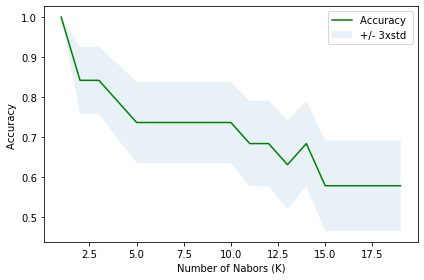

The best accuracy was with 1.0 with k= 1


In [23]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

<h4>
Proceed with k=1.  

In [24]:
CO_Medical.columns = ['zip','latitude','longitude','name','venue latitude','venue longitude']
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
X_medical_center =CO_Medical[['venue latitude', 'venue longitude','zip']].values 
X_medical_center = preprocessing.StandardScaler().fit(X_medical_center).transform(X_medical_center.astype(float))
yhat_medical_centers = neigh.predict(X_medical_center)
CO_Medical['Community']=yhat_medical_centers
CO_Medical.head()

,zip,latitude,longitude,name,venue latitude,venue longitude,Community
0,80002,39.79,-105.11,Kid Focus Dentistry,39.789936,-105.111984,2
1,80002,39.79,-105.11,Home Care Assistance Denver,39.786776,-105.108766,2
2,80002,39.79,-105.11,Thrive Health Systems,39.786102,-105.110630,2
3,80002,39.79,-105.11,Kingdom Family Chiropractic,39.786669,-105.111077,2
4,80002,39.79,-105.11,Just Wisdom teeth,39.786427,-105.111109,2


<h4>
Now we will visualize the assignment of communities of the medical centers.  In order to compare, we will use the same color assignment for the communities and medical centers. But the medical centers will be unfilled disks to differentiate.  

In [25]:
map_colorado_medical = folium.Map(location=[39.5501, -105.7821], zoom_start=7)

#for the zip code colors
for lat, lng, zipp, city, population, cluster in zip(Colorado_merge['latitude'], Colorado_merge['longitude'], Colorado_merge['zip'], Colorado_merge['primary_city'],Colorado_merge['pop'], Colorado_merge['Clus_Db2']):
    label = '{}, {}, population: {},community: {}'.format(city, zipp, population, cluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color_producer(cluster),
        fill=True,
        fill_color=color_producer(cluster),
        fill_opacity=0.7,
        parse_html=False).add_to(map_colorado_medical)     

# for the medical center colors - check if match
for lat, lng, name, community in zip(CO_Medical['venue latitude'], CO_Medical['venue longitude'], CO_Medical['name'], CO_Medical['Community']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color=color_producer(community),
        fill=False, # so we can distinguish the marks
        fill_color=color_producer(community),
        fill_opacity=0.7,
        parse_html=False).add_to(map_colorado_medical)  
    
map_colorado_medical

<h4>
Zoom in for the Denver Metro Area, so we can get a better look.    

In [26]:
map_colorado_medical_zoom = folium.Map(location=[39.5143, -104.8455], zoom_start=9)

#for the zip code colors
for lat, lng, zipp, city, population, cluster in zip(Colorado_merge['latitude'], Colorado_merge['longitude'], Colorado_merge['zip'], Colorado_merge['primary_city'],Colorado_merge['pop'], Colorado_merge['Clus_Db2']):
    label = '{}, {}, population: {},community: {}'.format(city, zipp, population, cluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color_producer(cluster),
        fill=True,
        fill_color=color_producer(cluster),
        fill_opacity=0.7,
        parse_html=False).add_to(map_colorado_medical_zoom)     

# for the medical center colors - check if match
for lat, lng, name, community in zip(CO_Medical['venue latitude'], CO_Medical['venue longitude'], CO_Medical['name'], CO_Medical['Community']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color=color_producer(community),
        fill=False, # so we can distinguish the marks
        fill_color=color_producer(community),
        fill_opacity=0.7,
        parse_html=False).add_to(map_colorado_medical_zoom)  
    
map_colorado_medical_zoom

<h4>
The assignment of medical communities looks appropriate.  So now we want to do some simple statistics and visualization to determine the best place to put the new medical center.  To prepare, we create a dataframe with some percentage information.  

In [27]:
Colorado_stats = Colorado_merge.copy()
Colorado_stats = Colorado_stats.groupby(['Clus_Db2']).sum()
Colorado_stats['over50'] = Colorado_stats['age50_54']+Colorado_stats['age55_59']+Colorado_stats['age60_64']+Colorado_stats['age65_69']+Colorado_stats['age70_74']+Colorado_stats['age75_79']+Colorado_stats['age80_84']+Colorado_stats['age85pl']
Colorado_stats['percentofColor'] = (Colorado_stats['pop']-Colorado_stats['white_nh'])/Colorado_stats['pop']*100
Colorado_stats['percentover50'] = (Colorado_stats['pop']-Colorado_stats['over50'])/Colorado_stats['pop']*100
Colorado_stats['percentofmen'] = (Colorado_stats['pop']-Colorado_stats['male'])/Colorado_stats['pop']*100
Colorado_stats['percentofwomen'] = 100-Colorado_stats['percentofmen']
Colorado_stats=Colorado_stats.drop([-1],axis=0)
Colorado_stats = Colorado_stats.reset_index(drop=True)
Colorado_stats.head()

,zip,latitude,longitude,pop,white_nh,male,female,age50_54,age55_59,age60_64,age65_69,age70_74,age75_79,age80_84,age85pl,Clus_km,Clus_km2,Clus_Db,over50,percentofColor,percentover50,percentofmen,percentofwomen
0,880179,438.42,-1155.96,302754,226993,148737,154017,23333,21498,18177,13418,9718,6939,5214,5510,44,80,0,103807,25.023947,65.712427,50.871995,49.128005
1,720155,357.26,-943.16,363922,170431,179556,184366,23479,21886,18938,12357,7796,5409,3951,3879,71,81,0,97695,53.168261,73.154962,50.660856,49.339144
2,1041588,514.48,-1364.68,357996,290813,176575,181421,29014,25644,21568,16038,10990,7748,5525,5968,37,20,0,122495,18.766411,65.783137,50.676823,49.323177
3,2567097,1270.95,-3359.57,825957,469117,413236,412721,49755,47775,43189,32177,21355,15588,12507,14438,158,79,0,236784,43.203218,71.332164,49.968824,50.031176
4,320968,159.61,-419.91,143187,87306,72489,70698,9681,8878,6602,5152,2953,2885,1555,1456,11,0,0,39162,39.026588,72.649752,49.374594,50.625406


<h4>
First we investigate a the total population of the communities.  I have also named the communities based on location (and a decade of living in the area).  

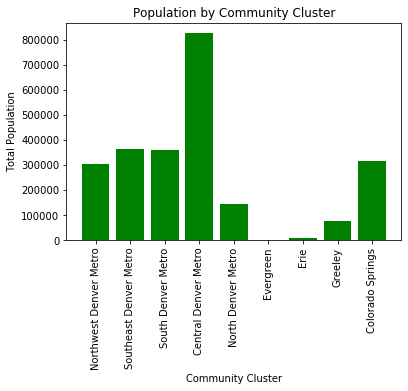

In [28]:
labels =  ['Northwest Denver Metro','Southeast Denver Metro','South Denver Metro','Central Denver Metro','North Denver Metro','Evergreen','Erie','Greeley','Colorado Springs']
plt.bar(labels,Colorado_stats['pop'], color='green')
plt.xlabel("Community Cluster")
plt.ylabel("Total Population")
plt.title("Population by Community Cluster")
plt.xticks(labels,rotation=90)
plt.show()

<h4>
While Central Denver Metro area has the largest population and Evergreen the least, we want to know how that compares to the number of medical centers in that area.  So we count how many medical centers are in each community and examine the percent in a bar graph.

In [29]:
CO_Medical['Community'].value_counts()

3    118
2     44
8     23
7     14
4      9
1      6
6      3
5      3
Name: Community, dtype: int64

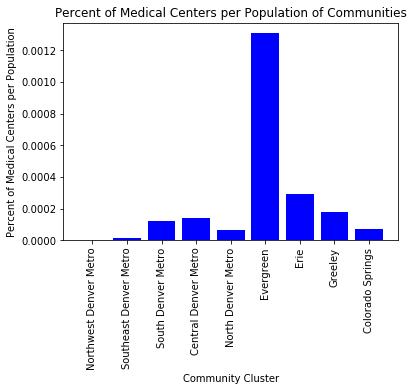

In [30]:
Colorado_stats['Number of Medical']=[0,6,44,118,9,3,3,14,23]
Colorado_stats['Percent Of Medical']=Colorado_stats['Number of Medical']/Colorado_stats['pop']
plt.bar(labels,Colorado_stats['Percent Of Medical'], color='blue')
plt.xlabel("Community Cluster")
plt.ylabel("Percent of Medical Centers per Population")
plt.title("Percent of Medical Centers per Population of Communities")
plt.xticks(labels,rotation=90)
plt.show()

<h4>
We can see from the bar graph above that Central Denver Metro area has the fourth highest percentage of medical centers.  So while the population is high, it may not be the most advantageous place to put a new center.  Also note that Northwest Denver Metro area seems to have no medical centers.  Now we examine the percent of folks of color.  

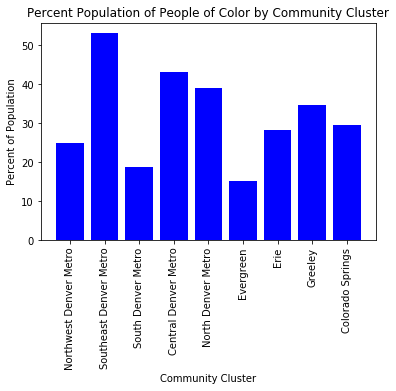

In [31]:
plt.bar(labels,Colorado_stats['percentofColor'], color='blue')
plt.xlabel("Community Cluster")
plt.ylabel("Percent of Population")
plt.title("Percent Population of People of Color by Community Cluster")
plt.xticks(labels, rotation=90)
plt.show()

<h4>
While I would have predicted that the Central Denver Metro area has the highest percentage of folks of color, and they do have the second highest, the Southeast Denver Metro area has the highest with over 50%.  Now we investigate the percent of folks 50 and over in our communities.

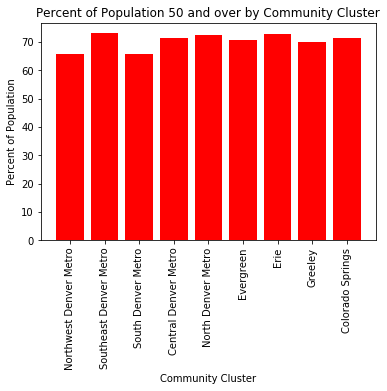

In [32]:
plt.bar(labels,Colorado_stats['percentover50'], color='red')
plt.xlabel("Community Cluster")
plt.ylabel("Percent of Population")
plt.title("Percent of Population 50 and over by Community Cluster")
plt.xticks(labels, rotation=90)
plt.show()

<h4>
The ages represented above are all quite similar, with the Southeast Denver Metro area with a slight lead.  Lastly, we investigate the gender breakdown.    

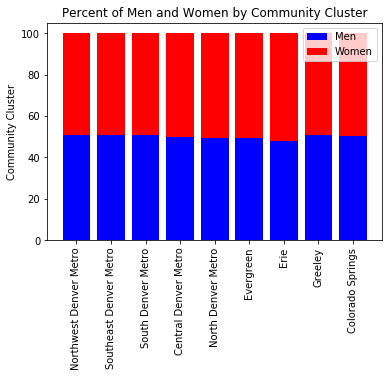

In [57]:
p1 = plt.bar(labels, Colorado_stats['percentofmen'],color='blue')
p2 = plt.bar(labels, Colorado_stats['percentofwomen'],color='red', bottom = Colorado_stats['percentofmen'] )
plt.ylabel('Community Cluster')
plt.title('Percent of Men and Women by Community Cluster')
plt.legend((p1[0], p2[0]), ('Men', 'Women'))
plt.xticks(labels, rotation=90)
plt.show()

<h4>
The above graph seem so to indicate only small fluctuations in the gender breakdown.  Please see the report for the final conclusions.  